In [200]:
import scipy.optimize
def find_hungarian(prev_frame, cur_frame):
    weights = np.zeros((np.shape(prev_frame)[0],np.shape(cur_frame)[0]))
    for i in range(np.shape(prev_frame)[0]):
        prev_point = prev_frame[i,:]
        for j in range(np.shape(cur_frame)[0]):
            weights[i,j] = np.linalg.norm(prev_frame[i,:] - cur_frame[j,:])
    row_ind, col_ind = scipy.optimize.linear_sum_assignment(weights)
    permute = [0]*9
    for i in range(len(row_ind)):
        permute[row_ind[i]] = col_ind[i]
    return cur_frame[permute,:]
    

In [201]:
import csv
import numpy as np

input_file = "vicon_data1/T02_15_2020-sLifting _Sample/t0/mMotionTracking-T02_15_2020-sLifting _Sample-t0-mocap.csv"
num_points = 9
data_array = np.zeros((0,num_points,3))
point_mapping_10 = [6,1,3,5,0,8,2,4,7]

with open(input_file) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count < 10:
            pass
            line_count += 1
        elif line_count == 10:
            detected_points = (len(row))/5
            current_row = np.zeros((num_points,3))
            for i in range(num_points):
                current_row[point_mapping_10[i],:] = row[2+5*i:2+5*i+3]
            current_row = np.expand_dims(current_row, axis=0)
            data_array = np.append(data_array, current_row, axis=0)
            line_count +=1
        else:
            detected_points = (len(row)-1)/5
            if detected_points != 9:
                continue
            current_row = np.zeros((num_points,3))
            for i in range(num_points):
                current_row[i,:] = row[2+5*i:2+5*i+3]
            #best_permutation_row = find_permutation(data_array[-1,:,:], current_row)
            best_permutation_row = find_hungarian(data_array[-1,:,:], current_row)
            best_permutation_row = np.expand_dims(best_permutation_row,axis=0)
            data_array = np.append(data_array, best_permutation_row, axis=0)
            line_count += 1

<IPython.core.display.Javascript object>


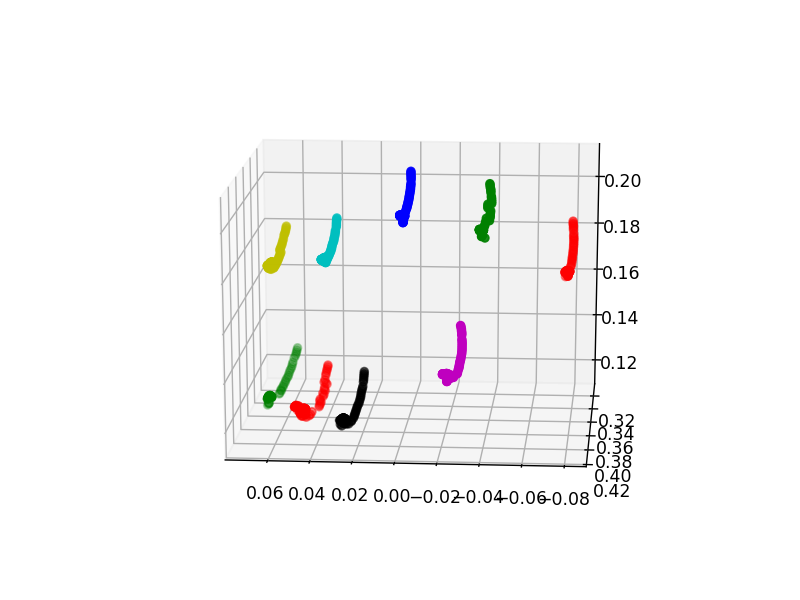

In [211]:
%matplotlib notebook
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
colors = ['r','g','b','c','y','m','k','r','g']
fig = plt.figure()
ax = plt.axes(projection='3d')
point_num = 0
for point_num in range(200,300):
    ax.scatter3D(data_array[point_num,:,0], data_array[point_num,:,1], data_array[point_num,:,2],c=colors);


<IPython.core.display.Javascript object>


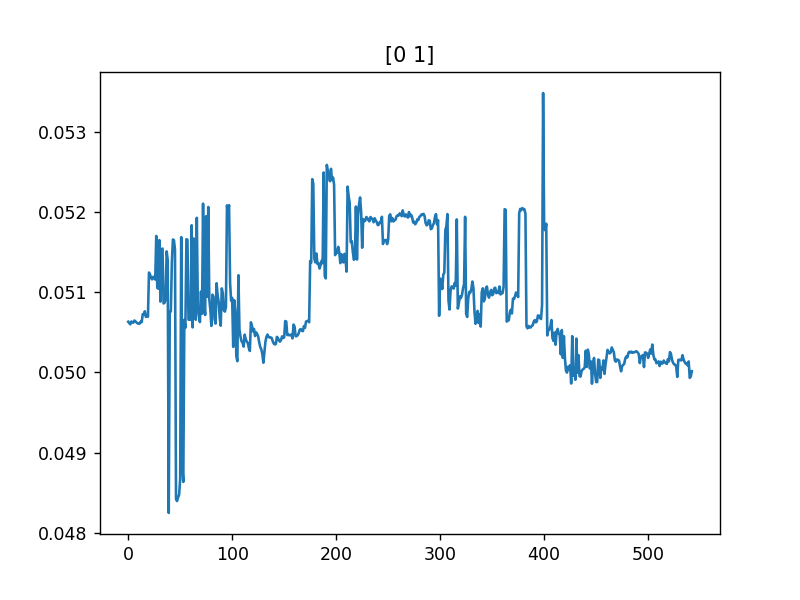

<IPython.core.display.Javascript object>


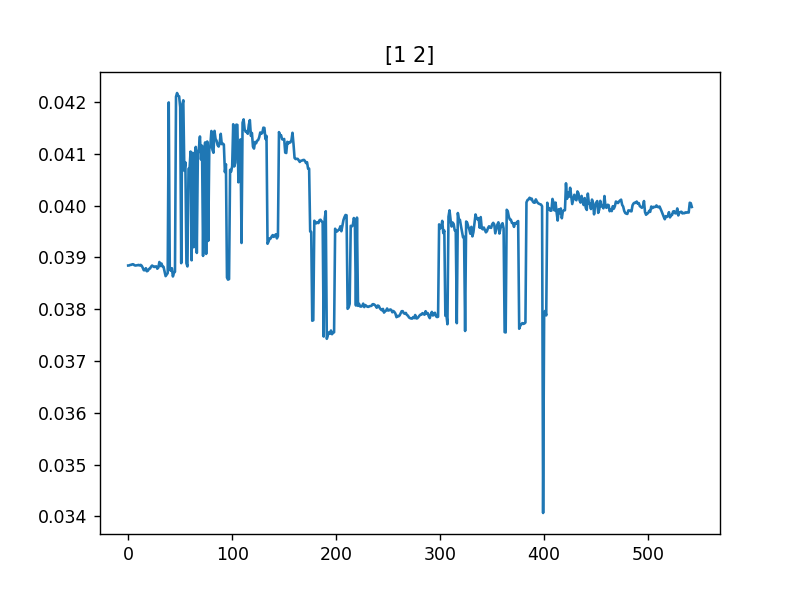

<IPython.core.display.Javascript object>


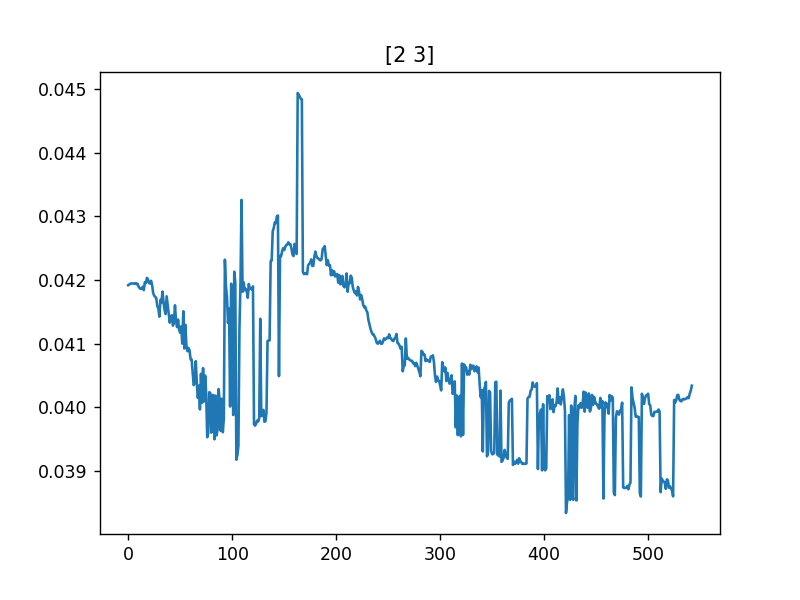

<IPython.core.display.Javascript object>


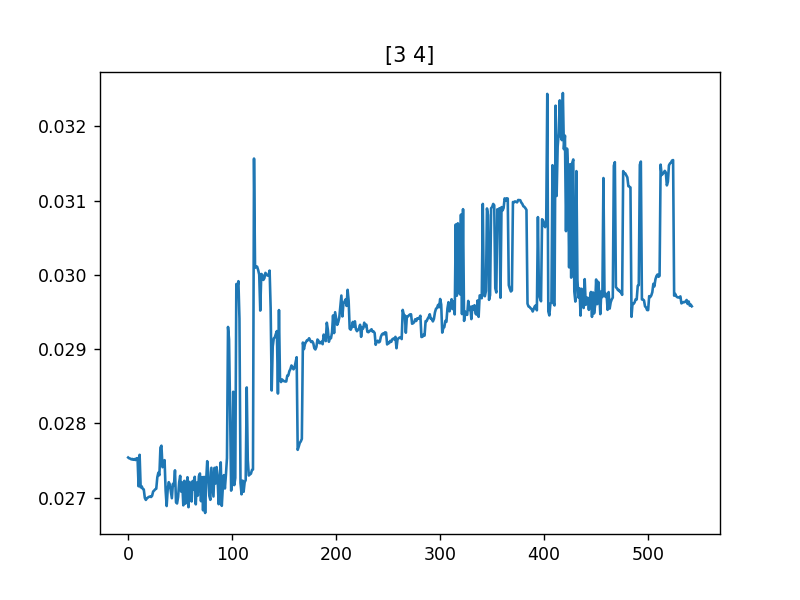

<IPython.core.display.Javascript object>


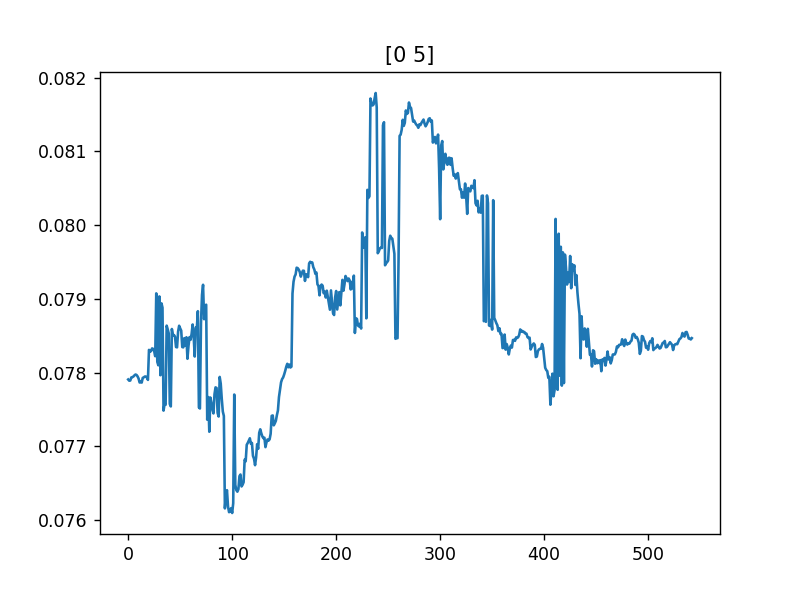

<IPython.core.display.Javascript object>


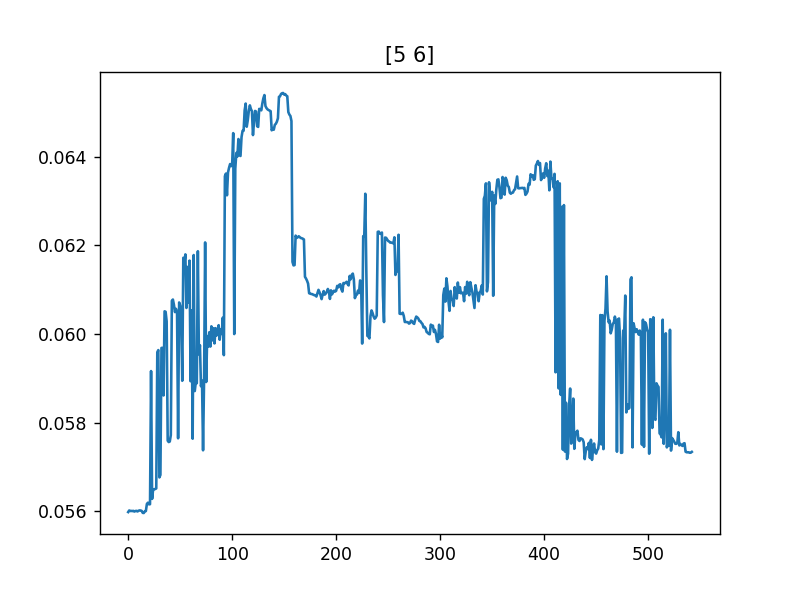

<IPython.core.display.Javascript object>


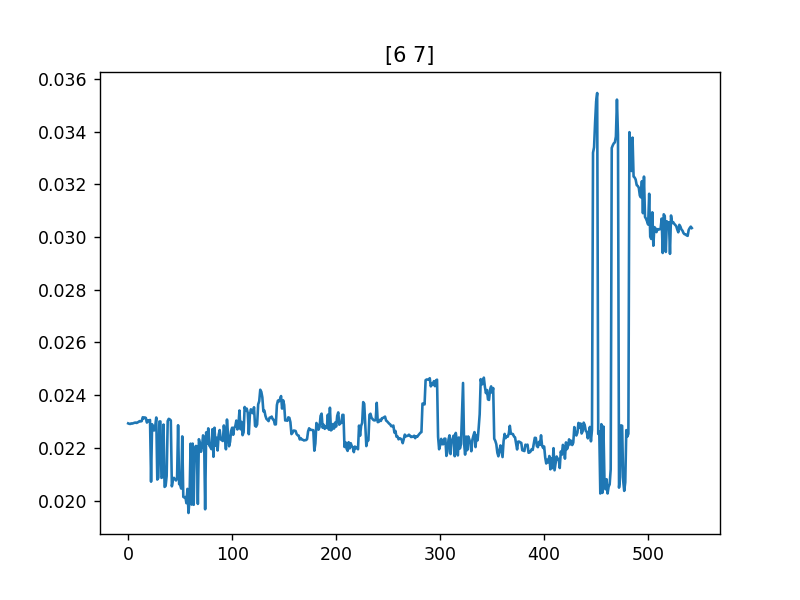

<IPython.core.display.Javascript object>


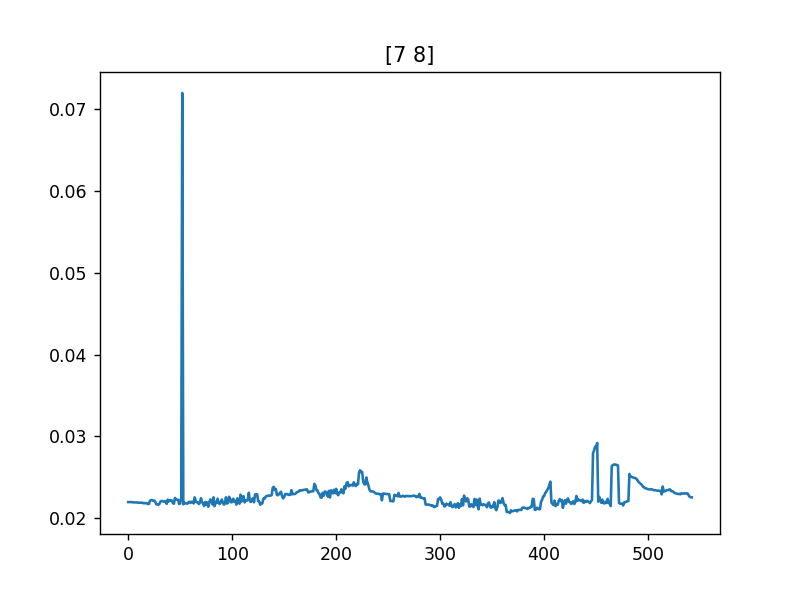

<IPython.core.display.Javascript object>


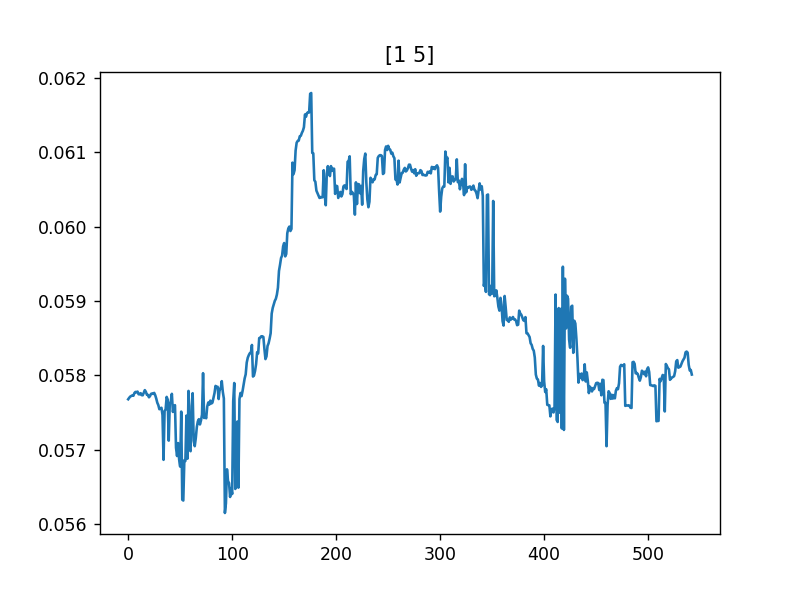

In [207]:
links = np.array([[0,1],[1,2],[2,3],[3,4],[0,5],[5,6],[6,7],[7,8],[1,5]])
for link in links:
    distances = np.linalg.norm(data_array[:,link[0],:] - data_array[:,link[1],:], axis=1)
    fig = plt.figure()
    ax = plt.axes()
    plt.title(str(link))
    ax.plot(distances)